In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
import sklearn.base 

seed = 24

In [2]:
df = pd.read_csv('new_churn.csv')
df

,churn,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,42,1,5,5,3,0,0,31,5,3,2,6748.0,1467,5281.0,0.831,1201,42,0.680,0.217
1,1,57,0,2,2,1,4,0,48,5,2,2,2436.0,680,1756.0,1.190,1570,29,0.611,0.279
2,1,45,0,2,2,1,5,0,37,6,1,2,14470.0,1157,13313.0,0.966,1207,21,0.909,0.080
3,0,62,0,0,2,1,4,0,49,2,3,3,1438.3,0,1438.3,1.047,692,16,0.600,0.000
4,1,47,0,4,6,2,4,0,36,3,3,2,2492.0,1560,932.0,0.573,1126,23,0.353,0.626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7429,0,48,1,4,0,1,3,0,44,2,3,3,9524.0,1449,8075.0,0.559,7527,58,0.657,0.152
7430,0,33,0,1,1,2,4,0,15,1,1,3,3709.0,1180,2529.0,0.645,8130,74,0.897,0.318
7431,0,49,0,4,5,1,1,0,36,5,2,3,4167.0,0,4167.0,0.581,7590,87,0.776,0.000
7432,0,52,0,5,6,1,4,0,36,4,3,3,9611.0,0,9611.0,0.840,7636,64,0.829,0.000


### Делим данные на категориальные и вещественные, x и y, train и test

In [3]:
categorial_columns = df.keys().tolist()[:8]
continious_columns = df.keys().tolist()[8:]
x = df.drop(df['churn'])
y = df['churn']
test_size = 0.2
data_train, data_test, y_train, y_test = train_test_split(
    df[df.columns.drop('churn')],
    np.array(df['churn']),
    test_size = test_size,
    random_state=seed
)
print(f'Train: {data_train.shape} {y_train.shape}')
print(f'Test: {data_test.shape} {y_test.shape}')
print(categorial_columns)
print(continious_columns)

Train: (5947, 19) (5947,)
Test: (1487, 19) (1487,)
['churn', 'Customer_Age', 'Gender', 'Dependent_count', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
['Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']


### Обучение линейных моделек
Вообще по сути линейные модельки не подходят, т. к. мы предсказываем класс, а не значение переменной

In [4]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# x_train = scaler.fit_transform(data_train)
# x_test = scaler.transform(data_test)

In [5]:
# from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error as mse

# lin_reg = LinearRegression()
# lin_reg.fit(x_train, y_train)
# y_pred_reg = lin_reg.predict(x_test)
# print(f'MAE = {mse(y_test, y_pred_reg)}')

In [6]:
# from sklearn.linear_model import Ridge

# ridge = Ridge()
# ridge.fit(x_train, y_train)
# y_pred_reg = ridge.predict(x_test)
# print(f'MAE = {mse(y_test, y_pred_reg)}')

## Обучение классификацонных моделек
### GradientBoosting

In [7]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score, confusion_matrix, classification_report

model = GradientBoostingClassifier()
model.fit(data_train, y_train)
y_pred = model.predict(data_test)
y_true = y_test
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.84      0.88       234
           1       0.97      0.99      0.98      1253

    accuracy                           0.96      1487
   macro avg       0.95      0.91      0.93      1487
weighted avg       0.96      0.96      0.96      1487



<Axes: >

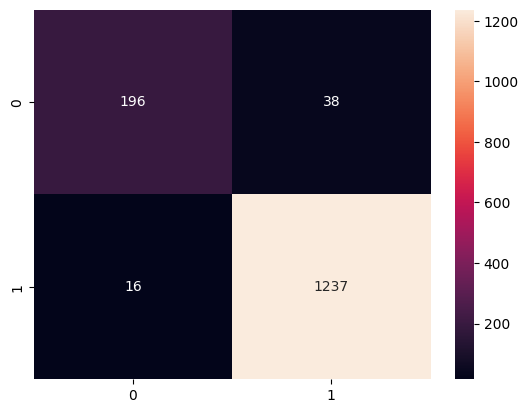

In [8]:
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='d')

### RandomForest

In [9]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(data_train, y_train)
y_pred = model.predict(data_test)
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.82      0.86       234
           1       0.97      0.98      0.98      1253

    accuracy                           0.96      1487
   macro avg       0.93      0.90      0.92      1487
weighted avg       0.96      0.96      0.96      1487



<Axes: >

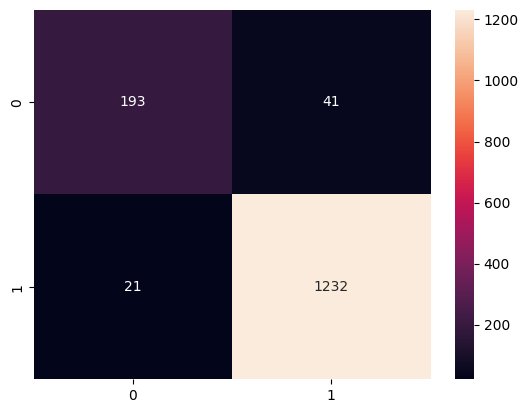

In [10]:
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='d')

### ExtraTrees

In [11]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(data_train, y_train)
y_pred = model.predict(data_test)
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.74      0.82       234
           1       0.95      0.99      0.97      1253

    accuracy                           0.95      1487
   macro avg       0.93      0.86      0.89      1487
weighted avg       0.95      0.95      0.95      1487



<Axes: >

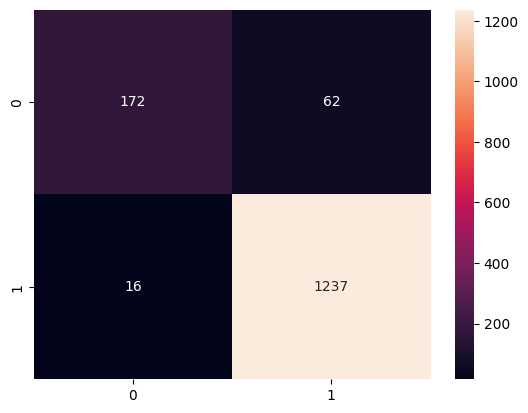

In [12]:
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='d')

### AdaBoostClassifier

In [13]:
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier()
model.fit(data_train, y_train)
y_pred = model.predict(data_test)
print(classification_report(y_true, y_pred))

/home/jupyter-zorkin.aa_isp32/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.87      0.85      0.86       234
           1       0.97      0.98      0.97      1253

    accuracy                           0.96      1487
   macro avg       0.92      0.91      0.92      1487
weighted avg       0.96      0.96      0.96      1487



<Axes: >

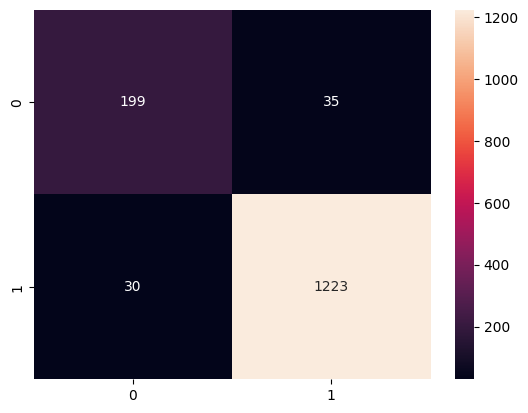

In [14]:
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='d')

In [15]:
from sklearn.ensemble import HistGradientBoostingClassifier

model = HistGradientBoostingClassifier()
model.fit(data_train, y_train)
y_pred = model.predict(data_test)
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.88      0.90       234
           1       0.98      0.98      0.98      1253

    accuracy                           0.97      1487
   macro avg       0.94      0.93      0.94      1487
weighted avg       0.97      0.97      0.97      1487



<Axes: >

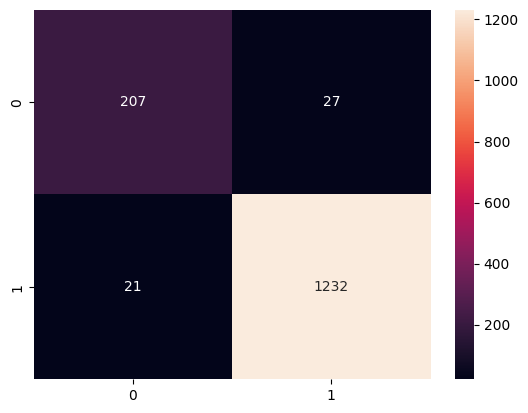

In [16]:
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='d')

### Выводы

Заметим, что все модельки обучились достаточно точно, но лучше всех обучились данные на GradientBoosting
f1-score по 0 = 0.88, он у нас наиболее влиятельный, тк классы несбалансированные